**Importing Libraries**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

**Loading Dataset**

In [5]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


**Exploratory Data Analysis**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [14]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [16]:
df["gender"] = df["gender"].map({"Female": 0, "Male": 1, "Other": 2})

In [18]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [20]:
df = pd.get_dummies(df, columns = ["smoking_history"], drop_first = True).astype(int)

In [22]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80,0,1,25,6,140,0,0,0,0,1,0
1,0,54,0,0,27,6,80,0,0,0,0,0,0
2,1,28,0,0,27,5,158,0,0,0,0,1,0
3,0,36,0,0,23,5,155,0,1,0,0,0,0
4,1,76,1,1,20,4,155,0,1,0,0,0,0


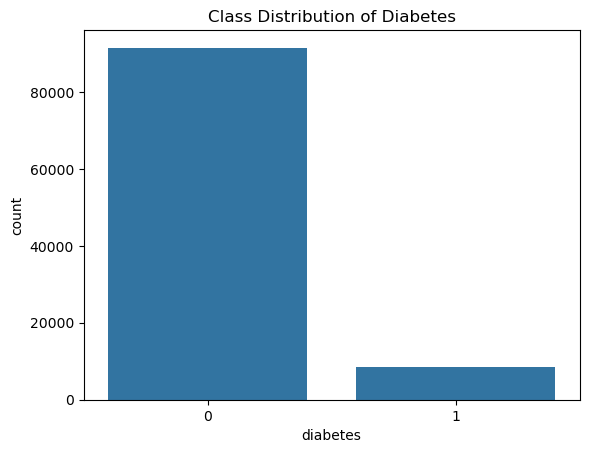

In [24]:
sns.countplot(x="diabetes", data=df)
plt.title("Class Distribution of Diabetes")
plt.show()

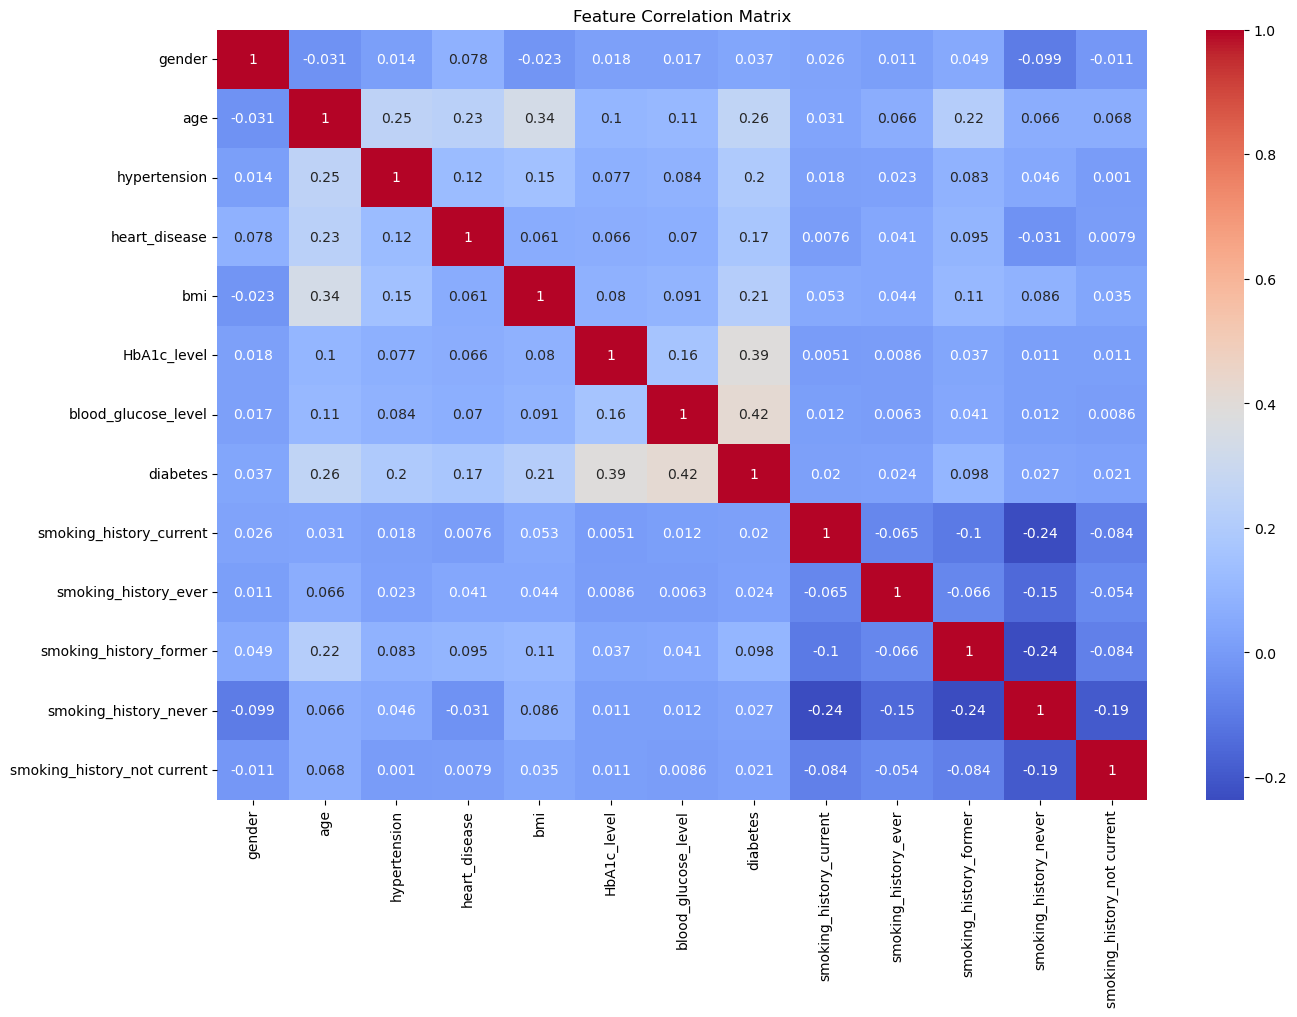

In [26]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [28]:
#imbalance detected model could lean towards 0 for diabetics and still be accurate. Lets fix it
from sklearn.model_selection import train_test_split

X = df.drop(["diabetes"], axis = 1)
y = df["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
sm = SMOTE(random_state = 42)
X_train_res, y_train = sm.fit_resample(X_train_scaled, y_train)

In [36]:
print("Resampled training set shape:", X_train_res.shape)
print("Resampled class distribution:\n", pd.Series(y_train).value_counts())

Resampled training set shape: (146400, 12)
Resampled class distribution:
 diabetes
1    73200
0    73200
Name: count, dtype: int64


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model = RandomForestClassifier(random_state = 42)

In [42]:
model.fit(X_train_res, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred = model.predict(X_test_scaled)

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Accuracy Score:  0.95035
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.97      0.97     18300
           1       0.71      0.71      0.71      1700

    accuracy                           0.95     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.95      0.95      0.95     20000

Confusion Matrix:  [[17806   494]
 [  499  1201]]


In [60]:
import joblib

# assuming your model is named `model`
joblib.dump(model, 'Diabetes_prediction.pkl')



['Diabetes_prediction.pkl']

In [56]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']